In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [4]:
df_X = df_raw[[c for c in df.columns if c != 'vote']]

,comp_0,comp_1
0,-0.030729,0.062200
1,0.043332,-0.017820
2,0.030419,-0.022949
3,0.043822,-0.013643
4,0.066841,0.033058
...,...,...
939,-0.060536,0.032029
940,-0.053303,0.010613
941,-0.060843,-0.006511
942,-0.059869,0.012126


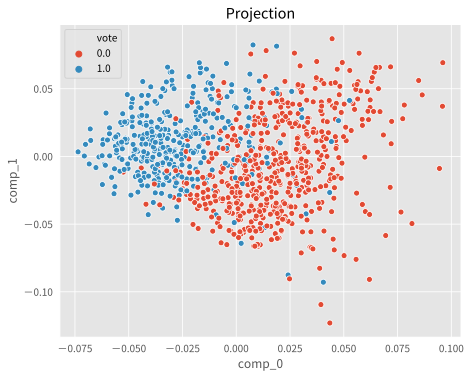

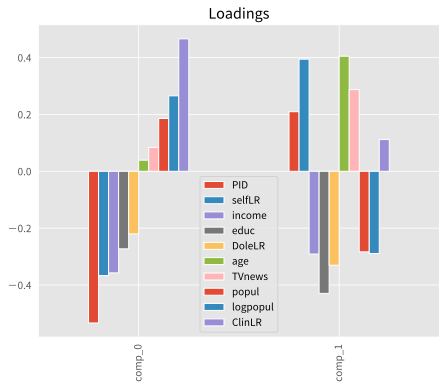

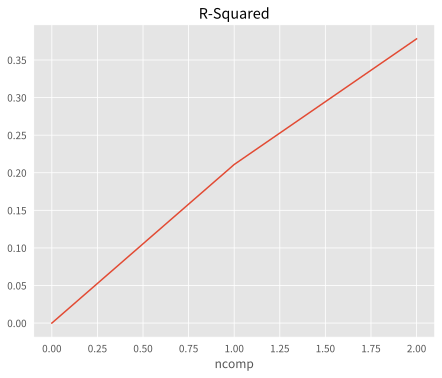

In [5]:
# shorthands: pc

pc = sm.PCA(df_X, ncomp=2)

df = pc.factors
display(df)

df = pc.factors
sns.scatterplot(data=df,
                x='comp_0',
                y='comp_1',
                hue=df_raw.vote)
plt.title('Projection')
plt.show()

df = pc.loadings.T
df = df.sort_values(axis=1, by='comp_0')
df.plot.bar()
plt.title('Loadings')
plt.show()

pc.rsquare.plot()
plt.title('R-Squared')
plt.show()

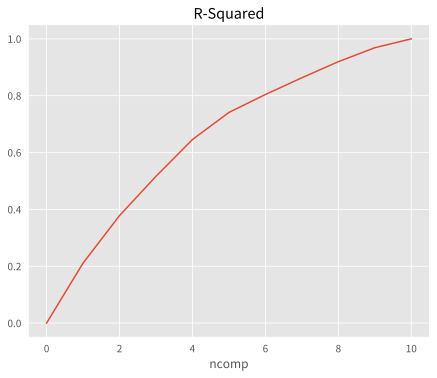

In [6]:
pc = sm.PCA(df_X)
pc.rsquare.plot()
plt.title('R-Squared')
plt.show()

Try out the scikit-learn version:

In [7]:
from sklearn import preprocessing
from sklearn import decomposition

In [8]:
X_raw = df_X.values  # type: np.array

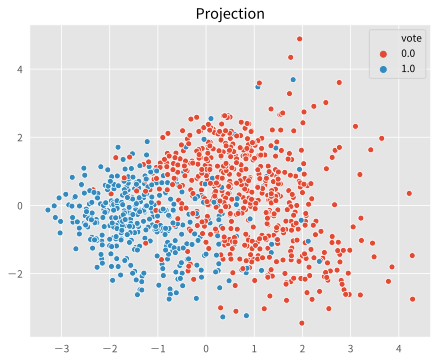

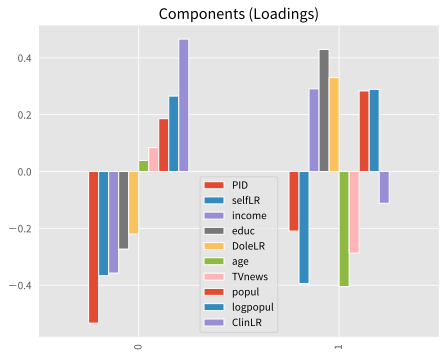

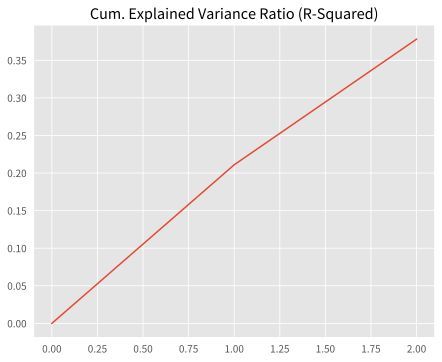

In [9]:
# shorthands: X, scaler, pca, a

X = X_raw

# in scikit-learn, we have to standardize by ourself
scaler = preprocessing.StandardScaler()
pca = decomposition.PCA(n_components=2, random_state=20200501)

X = scaler.fit_transform(X)  # fit and then transform
X = pca.fit_transform(X)

sns.scatterplot(x=X[:, 0],
                y=X[:, 1],
                hue=df_raw.vote)
plt.title('Projection')
plt.show()

# scikit-learn prefers returning np.array
# let's build a more understandable dataframe
df = pd.DataFrame(pca.components_,
                  columns=df_X.columns)
df = df.sort_values(axis=1, by=0)
df.plot.bar()
plt.title('Components (Loadings)')
plt.show()

a = pca.explained_variance_ratio_.cumsum()
a = np.insert(a, 0, 0)
plt.plot(a)
plt.ylim()
plt.title('Cum. Explained Variance Ratio (R-Squared)')
plt.show()

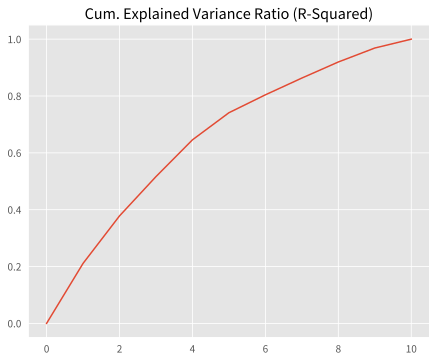

In [10]:
X = X_raw
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
pca = decomposition.PCA(random_state=20200501)
X = pca.fit_transform(X)
a = pca.explained_variance_ratio_.cumsum()
a = np.insert(a, 0, 0)
plt.plot(a)
plt.title('Cum. Explained Variance Ratio (R-Squared)')
plt.show()